<a href="https://colab.research.google.com/github/khatriprajwol/Data-Visualization-/blob/main/Recreating%20The%20Master%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TOP 20 MOST VALUABLE SOCCER TEAMS(2016)
Here I would lke to present you one of my favorite topic again which is related to sport. In this project it focuses on top twenty most valuable soccer team over the year and how it changed. However, I will be recreting only one of it. Well, recreating masters work will not be easy but I will try my best. 

![Picture1](https://www.adifferentleague.co.uk/wp-content/uploads/2016/05/juve-forbes2.jpg)


The above visualization is from 2016 but I would like to create similar master piece with a current data. In order to make similar visualization I will need the name of a club and its information. I tried to search data through **ESPN** but I could not find it. Therefore my alternative option was [wikipedia](https://en.wikipedia.org/wiki/Forbes%27_list_of_the_most_valuable_football_clubs).




![Picture2](https://www.adifferentleague.co.uk/wp-content/uploads/2016/05/juve-forbes.jpg)






Here is another diagram. As we can see the change in percentage from 2015 to 2016. Can we see any change? Yes, indeed. Let's see what we can expect in 2021. Well, the graph below shows the information how it changed in another year.

![Picture](https://www.statista.com/graphic/1/300578/team-value-of-soccer-teams.jpg)

The above graph can be found in this [link]("https://www.statista.com/statistics/300578/team-value-of-soccer-teams/"). I think this graph did not do a great job in visualization. No doubtt it provides the information but still not a great visualization. 


#**THE GRAPH I WILL BE RECREATING**
I am planning to use one of the first graph i.e. `Top 20 Most Valuable Soccer Team (2016)`. It looks a great visualization to me. In my graph it will not have **color key** because the data I have found associated with it do not contain the information about it. Hence, I would like to say my work as a recreating of some of master's work. 

In [414]:
import numpy as np #a matrix like package for handling data
import pandas as pa #a R like package for handling data
from scipy import stats #a way to just get a piece of a large package
import matplotlib.pyplot as plt #a way to generate plots, histograms, bar charts, and other types of charts 
import seaborn as sns #it is based on matplotlib
import requests #HTTP library
import pandas as pd # used to manipulate data and analyze it
from bs4 import BeautifulSoup #Used for a web scraping purposes to pull the data out of HTML and XML files
import re #Used for regular expression in Python.


In [415]:
r = requests.get('https://en.wikipedia.org/wiki/Forbes%27_list_of_the_most_valuable_football_clubs')
html_contents = r.text
html_soup = BeautifulSoup(html_contents,"lxml")
len(html_soup.find_all('table'))

17

In [416]:
html_soup.title

<title>Forbes' list of the most valuable football clubs - Wikipedia</title>

In [417]:
tables = html_soup.find_all('table')

df = pa.read_html(str(tables))[5]
df

,Rank,Team,Country,Value ($M)[10],Debt as% of value[8],% changeon year,Revenue ($M)
0,1,Real Madrid,Spain,3645,3,12.0,694
1,2,Barcelona,Spain,3549,2,12.0,675
2,3,Manchester United,England,3317,20,7.0,625
3,4,Bayern Munich,Germany,2678,0,14.0,570
4,5,Arsenal,England,2017,17,54.0,524
5,6,Manchester City,England,1921,0,40.0,558
6,7,Chelsea,England,1661,0,21.0,505
7,8,Liverpool,England,1548,5,58.0,471
8,9,Juventus,Italy,1299,4,55.0,390
9,10,Tottenham Hotspur,England,1017,2,69.0,310


It is not a big data set but a perfect for me to recreate the above visualization. 
[link](https://github.com/nurfnick/Data_Viz/blob/main/RecreatingMasters.ipynb) Here, I am going to need to do lot of cleaning for the columns. 


In [418]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  20 non-null     int64  
 1   Team                  20 non-null     object 
 2   Country               20 non-null     object 
 3   Value ($M)[10]        20 non-null     int64  
 4   Debt as% of value[8]  20 non-null     int64  
 5   % changeon year       19 non-null     float64
 6   Revenue ($M)          20 non-null     int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 1.2+ KB


The command **df.info()** helps me find **dtype**. There are four integer data, two object and one float. Also, I need to do lot of cleanings of my columns. You can see there are extra information which will make my visualization less effective.

In [419]:
df.columns

Index(['Rank', 'Team', 'Country', 'Value ($M)[10]', 'Debt as% of value[8]',
       '% changeon year', 'Revenue ($M)'],
      dtype='object')

Instead of going back and looking at my table columns name, I am running **df.columns** to list all the columns in my data. We can always go back and look at the columns name. However, df.columns just saves us lot of time and makes our job easier. Here, we can see there are [], (), %. Let's clean (%) part from the column and any other special character between them. 

In [420]:
cols = df.columns.map(lambda s: re.sub(r"[.\d[(.$M%\d)\]]","",s))
cols

Index(['Rank', 'Team', 'Country', 'Value ', 'Debt as of value',
       ' changeon year', 'Revenue '],
      dtype='object')

I have used **RegEx** package to clean my data. It took me a while to do this but surprisingly I figured it out. At first I tried it without () which gave me a pain in my head. However, after putting the brackets it seems to be working.

In [421]:
df.columns = df.columns.map(lambda s: re.sub(r"[.\d[(.$M%\d)\]]","",s))

Now, I will apply this to my old table. Let's see if my data is cleaned properly. 

In [422]:
df.columns

Index(['Rank', 'Team', 'Country', 'Value ', 'Debt as of value',
       ' changeon year', 'Revenue '],
      dtype='object')

There is still a space between world, I will go ahead and clean those as well. 

In [423]:
cols1 = df.columns.map(lambda s: re.sub(r" ","",s))
cols1

Index(['Rank', 'Team', 'Country', 'Value', 'Debtasofvalue', 'changeonyear',
       'Revenue'],
      dtype='object')

In [424]:
df.columns = df.columns.map(lambda s: re.sub(r" ","",s))

In [425]:
df.columns

Index(['Rank', 'Team', 'Country', 'Value', 'Debtasofvalue', 'changeonyear',
       'Revenue'],
      dtype='object')

Now, I will apply this to my old table. In the below table now we can see the cleaned columns.

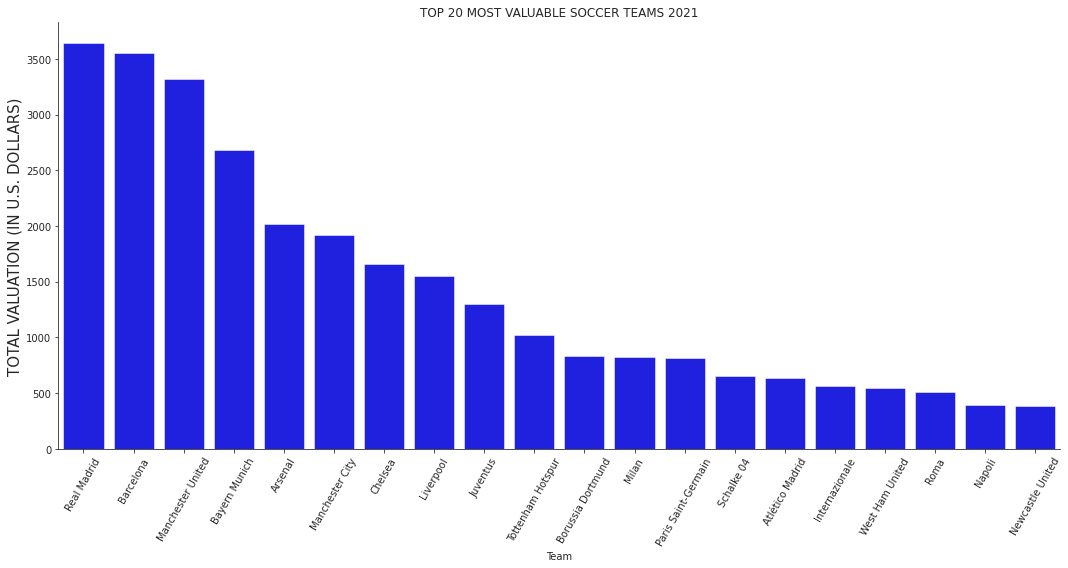

In [426]:

from os import major

plt.rcParams["figure.figsize"] = [15, 8]
plt.rcParams["figure.autolayout"] = True
sns.set_style('ticks')
ax = sns.barplot(data = df, x = 'Team', y= "Value", color= 'Blue', ci= None, linewidth = 0.5 )
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_title('TOP 20 MOST VALUABLE SOCCER TEAMS 2021')
ax.set_ylabel("TOTAL VALUATION (IN U.S. DOLLARS)", size = float(15.0))
sns.despine()
plt.show()

In [427]:
plt.rcParams["figure.figsize"] = [15, 8]
plt.rcParams["figure.autolayout"] = True
sns.set_style('ticks')
ax = sns.barplot(data = df, x = 'Team', y= "Value ($M)[10]", color= 'Blue', ci= None, linewidth= 0.5)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_title('TOP 20 MOST VALUABLE SOCCER TEAMS 2021')
sns.despine()
plt.show()

ValueError: ignored

In [ ]:
import matplotlib
matplotlib.__version__

In [ ]:
ax = df.groupby('Team')..plot(kind = 'bar', stacked = True)

for container in ax.containers:
    ax.bar_label(container)
for container in ax.containers:
    ax.bar_label(container)

In [ ]:
#def addlabels(x,y):
 #   for i in range(len(x)):
  #      plt.text(i, y[i], y[i], ha = 'center')
#plt.title("TOP 20 MOST VALUABLE SOCCER TEAMS 2021")
#plt.bar(df["Team"], df["Value ($M)[10]"], color= "Blue")
#addlabels(x,y)
#plt.show()


Well, the graph does not quick looks like that. But I will try to do it in a different way. Let's see if it will work. 